# Custom halftoning with SDFs
Ordered dithering & halftoning algorithms typically use predefined threshold matrices
with unique values ranging from `1//n` to `(n-1)/n`, where `n` is the number of elements
in the matrix.

In this example, we will be generating these threshold matrices
from signed distance functions (SDFs). A good resource for those is Inigo Quilez'
blogpost ["2D distance functions"](https://www.iquilezles.org/www/articles/distfunctions2d/distfunctions2d.htm).

Here we reimplement his function `sdStar5`:

In [1]:
using Images
using DitherPunk
using TestImages

function star_sdf(x, y; r=0.5, rf=2.0)
    k1 = [0.809016994375, -0.587785252292]
    k2 = [-k1[1], k1[2]]
    p = [abs(x), y]
    p -= 2.0 * maximum([k1 ⋅ p, 0.0]) * k1
    p -= 2.0 * maximum([k2 ⋅ p, 0.0]) * k2
    p = [abs(p[1]), p[2] - r]
    ba = rf * [-k1[2], k1[1]] - [0, 1]
    h = clamp((p ⋅ ba) / (ba ⋅ ba), 0.0, r)
    return norm(p - ba * h) * sign(p[2] * ba[1] - p[1] * ba[2])
end;

This SDF can be visualized by its contour:

![](https://user-images.githubusercontent.com/20258504/144755939-19b13e29-e50b-4744-bdeb-234f33790ca8.png)

To convert an SDF to an `OrderedDither` algorithm, use this function:

In [2]:
function sdf2halftone(sdf, n)
    rg = range(-1, 1; length=n)
    A = [sdf(x, y) for y in rg, x in rg]
    p = sortperm(reshape(-A, :))
    B = Vector{Int}(undef, n^2)
    B[p] .= 1:(n^2)
    return OrderedDither(reshape(B, size(A)...)//(n^2 + 1))
end;

Let's try it on a test image:

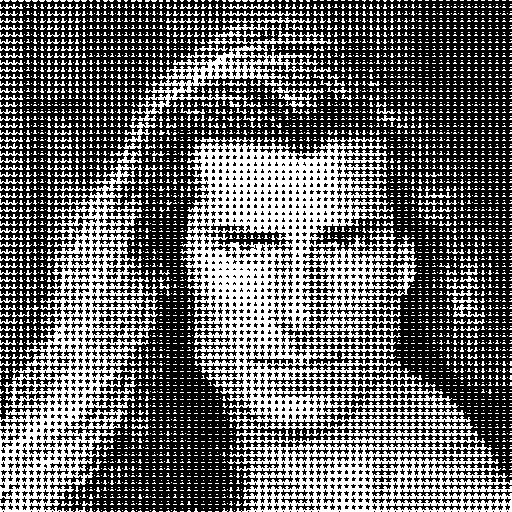

In [3]:
img = testimage("fabio_gray_512")
alg = sdf2halftone(star_sdf, 7)
dither(img, alg)

We can also change the size of the matrix.
Large halftoning matrices look great on high resolution images.

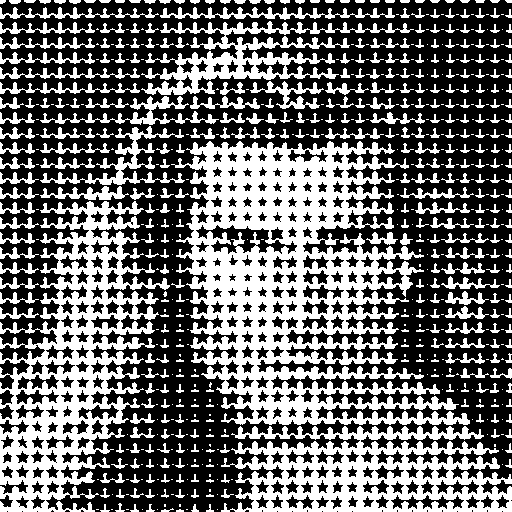

In [4]:
alg = sdf2halftone(star_sdf, 15)
dither(img, alg)

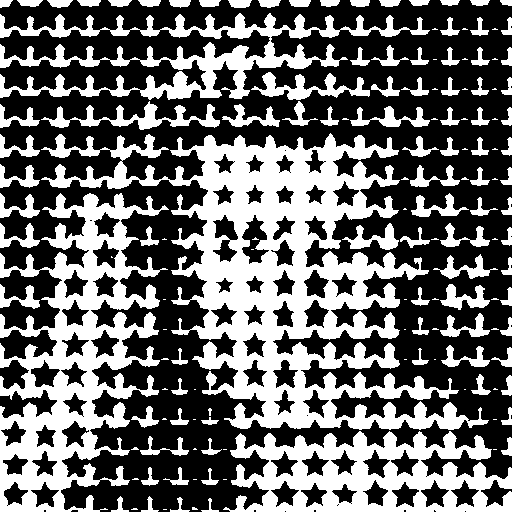

In [5]:
alg = sdf2halftone(star_sdf, 30)
dither(img, alg)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*